In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn import svm
import pickle 

In [2]:
df = pd.read_csv(r"C:\Users\online\Downloads\spam.csv")

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.shape

(5572, 2)

In [8]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df= df.rename(columns= {'Category':"Target"})

In [11]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [12]:
df.duplicated().sum()

415

In [13]:
encoder =LabelEncoder()
df["Target"]=encoder.fit_transform(df["Target"])
df["Target"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5572, dtype: int32

In [14]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


([<matplotlib.patches.Wedge at 0x2818d3b2c10>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.6'),
  Text(0.5475662602592474, -0.2452981667801496, '13.4')])

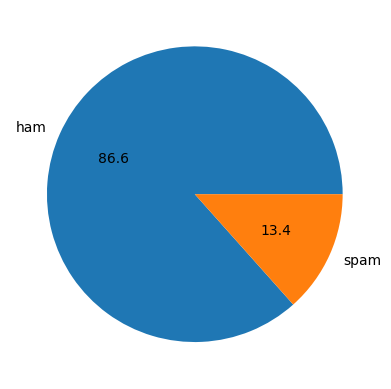

In [15]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct='%.1f')

In [16]:
x = df["Message"]
y = df["Target"]

In [17]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5572, dtype: int32

In [18]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [19]:
x_train , x_test ,y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=42)

In [20]:
cv=CountVectorizer()

In [21]:
x_train_df = cv.fit_transform(x_train)
x_test_df = cv.transform(x_test)

In [22]:
print(x_train_df)

  (0, 5687)	1
  (0, 6888)	3
  (0, 7474)	1
  (0, 258)	1
  (0, 7396)	1
  (0, 7437)	1
  (0, 7471)	1
  (0, 6773)	1
  (0, 354)	1
  (0, 2805)	1
  (0, 7555)	1
  (0, 2106)	1
  (0, 1271)	1
  (0, 3364)	1
  (0, 5980)	1
  (0, 6460)	1
  (0, 694)	1
  (0, 2568)	1
  (0, 5999)	1
  (1, 7471)	1
  (1, 3369)	1
  (1, 6304)	1
  (1, 4854)	1
  (1, 4976)	1
  (1, 3603)	1
  :	:
  (4452, 7535)	1
  (4452, 2502)	1
  (4452, 7519)	1
  (4453, 1606)	1
  (4453, 6303)	1
  (4453, 4129)	1
  (4453, 3997)	1
  (4454, 2984)	1
  (4454, 3351)	1
  (4454, 5584)	1
  (4454, 5321)	1
  (4454, 6309)	1
  (4454, 6308)	1
  (4455, 6904)	1
  (4455, 4812)	1
  (4455, 3812)	1
  (4455, 5996)	1
  (4456, 3712)	1
  (4456, 3841)	1
  (4456, 2294)	1
  (4456, 3339)	1
  (4456, 5895)	1
  (4456, 6666)	1
  (4456, 6268)	1
  (4456, 4660)	1


In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(x_train_df,y_train)
prediction_train = lr.predict(x_train_df)

In [25]:
#accuracy metrics trai model
print(accuracy_score(y_train,prediction_train)*100)

99.798070450976


In [26]:
prediction_test =  lr.predict(x_test_df)

In [28]:
# print(accuracy_score(y_test,prediction_train)*100)

In [ ]:
print(accuracy_score(x_train,prediction_train)*100)

In [29]:
import pickle 

file =  open("logistic_regression.pkl",'wb') #model saved 

pickle.dump(lr,file)